In [6]:
import numpy as np
import random

In [2]:
def generate_test_data(size, sigma):
    X = np.array([np.array([1 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma))
    return X, Y

In [3]:
trainX, trainY = generate_test_data(5000, 0.05)

In [11]:
import numpy as np
import random
from math import log2
import statistics as st

def generate_x_data(size):
    X = np.array([np.array([1 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    return X, X.T

def generate_y_data(X, sigma):
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma))
    return Y

def p(a, b):
    return (a / b)

def p2(a, b):
    if a == 0:
        return 0
    return p(a, b) * log2(p(a, b))

cnt = 0
class DecisionTree():
    def __init__(self, x, y, d, sample_size):
        
        self.x, self.y, self.d = x, y, d
        
        self.ind = -1
        self.left, self.right = None, None
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        #self.result = self.y[0]
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        self.result = ((self.y == 1).sum()) / len(self.y)
        
        self.sample_size = sample_size
        
        if not self.child:
            self.split()

    def find_best_index(self):
        Hy = -p2(len(self.y[self.y == -1]), len(self.y)) - p2(len(self.y[self.y == 1]), len(self.y)) - p2(len(self.y[self.y == 0]), len(self.y))
        
        IG, ind = float('-inf'), -1
        
        for i, xi in enumerate(self.x):
            xi_neg_fltr = xi == -1
            xi_pos_fltr = xi == 1
            
            x_neg_sz = len(xi[xi_neg_fltr])
            x_pos_sz = len(xi[xi_pos_fltr])
            
            y_neg = self.y[xi_neg_fltr]
            
            y_neg_neg = len(y_neg[y_neg == -1])
            y_neg_pos = len(y_neg[y_neg == 1])
            y_neg_zer = len(y_neg[y_neg == 0])
            
            sm_y_neg = -p2(y_neg_neg, x_neg_sz) - p2(y_neg_pos, x_neg_sz) - p2(y_neg_zer, x_neg_sz)
            y_pos = self.y[xi_pos_fltr]
            
            y_pos_neg = len(y_pos[y_pos == -1])
            y_pos_pos = len(y_pos[y_pos == 1])
            y_pos_zer = len(y_pos[y_pos == 0])
            
            sm_y_pos = -p2(y_pos_neg, x_pos_sz) - p2(y_pos_pos, x_pos_sz) - p2(y_pos_zer, x_pos_sz)
            
            sm = p(x_neg_sz, len(xi)) * sm_y_neg + p(x_pos_sz, len(xi)) * sm_y_pos
            IG_i = Hy - sm
            
            if IG_i > IG:
                ind, IG = i, IG_i
        
        #print(" ", ind)
        return ind
    
    def split(self):
        self.ind = self.find_best_index()
        print(self.ind)
        if self.ind >= 5:
            cnt += 1
        xi = self.x[self.ind]
        
        fltr_left = xi == -1
        fltr_right = xi == 1
        
        x_left = [x_i[fltr_left] for x_i in self.x]
        x_right = [x_i[fltr_right] for x_i in self.x]
    
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]

        self.left = DecisionTree(x_left, y_left, self.d + 1, self.sample_size)
        self.right = DecisionTree(x_right, y_right, self.d + 1, self.sample_size)
    
    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        return DecisionTree.predict(node.left, arr) if arr[node.ind] == -1 else DecisionTree.predict(node.right, arr)
        

In [9]:
import copy
import matplotlib.pyplot as plt
def question1():
    train_mismatches = []
    test_mismatches = []
    
    trainX, trainX_transpose = generate_x_data(5000)
    trainY = generate_y_data(trainX, 0.05)
    
    testX, testX_transpose = generate_x_data(500)
    testY = generate_y_data(testX, 0.05)
    
    for sample_size in range(1, 5001, 2):
        dt = DecisionTree(copy.deepcopy(trainX), copy.deepcopy(trainY), 1, sample_size)
        cnt = 0
        for row_num, row in enumerate(trainX_transpose):
            if DecisionTree.predict(dt, row) != trainY[row_num]:
                cnt += 1
        train_mismatches.append(cnt)
        
        cnt = 0
        for row_num, row in enumerate(testX_transpose):
            if DecisionTree.predict(dt, row) != testY[row_num]:
                cnt += 1
        test_mismatches.append(cnt)
        #print('Number of mismatches on sample size {0}: {1}'.format(sample_size, cnt))
    
    
    plt.figure(figsize = (6, 10), dpi = 80)
    plt.title('Training/Testing Error on Decision Tree with varying sample size')
    plt.plot(range(1, 5001, 2), train_mismatches, '-b', label = 'Train Error')
    plt.plot(range(1, 5001, 2), test_mismatches, '-r', label = 'Test Error')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of mismatches')
    plt.legend()
    plt.show()
    
    return mismatches


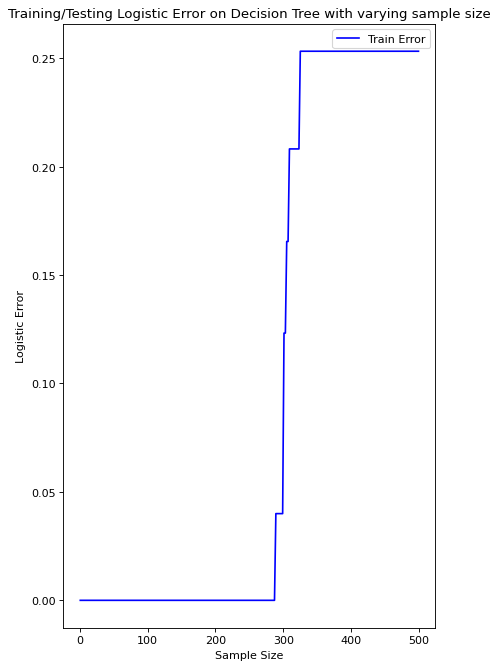

In [92]:
class LogisticTree():
    def __init__(self, x, y, d, sample_size):
        
        self.x, self.y, self.d = x, y, d
        
        self.ind = -1
        self.left, self.right = None, None
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        self.result = ((self.y == 1).sum()) / len(self.y)
        
        self.sample_size = sample_size
        
        if not self.child:
            self.split()

    def find_best_index(self):
        Hy = -p2(len(self.y[self.y == 0]), len(self.y)) - p2(len(self.y[self.y == 1]), len(self.y))
        
        IG, ind = float('-inf'), -1
        
        for i, xi in enumerate(self.x):
            xi_neg_fltr = xi == -1
            xi_pos_fltr = xi == 1
            
            x_neg_sz = len(xi[xi_neg_fltr])
            x_pos_sz = len(xi[xi_pos_fltr])
            
            y_neg = self.y[xi_neg_fltr]
            
            y_neg_neg = len(y_neg[y_neg == 0])
            y_neg_pos = len(y_neg[y_neg == 1])
            
            sm_y_neg = -p2(y_neg_neg, x_neg_sz) - p2(y_neg_pos, x_neg_sz)
            y_pos = self.y[xi_pos_fltr]
            
            y_pos_neg = len(y_pos[y_pos == 0])
            y_pos_pos = len(y_pos[y_pos == 1])
            
            sm_y_pos = -p2(y_pos_neg, x_pos_sz) - p2(y_pos_pos, x_pos_sz) 
            
            sm = p(x_neg_sz, len(xi)) * sm_y_neg + p(x_pos_sz, len(xi)) * sm_y_pos
            IG_i = Hy - sm
            
            if IG_i > IG:
                ind, IG = i, IG_i
        
        #print(" ", ind)
        return ind
    
    def split(self):
        self.ind = self.find_best_index()
        xi = self.x[self.ind]
        
        fltr_left = xi == -1
        fltr_right = xi == 1
        
        x_left = [x_i[fltr_left] for x_i in self.x]
        x_right = [x_i[fltr_right] for x_i in self.x]
    
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]

        self.left = LogisticTree(x_left, y_left, self.d + 1, self.sample_size)
        self.right = LogisticTree(x_right, y_right, self.d + 1, self.sample_size)
    
    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        return LogisticTree.predict(node.left, arr) if arr[node.ind] == -1 else LogisticTree.predict(node.right, arr)

    
def generate_x_data_logist(size):
    X = np.array([np.array([1.0 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    return X, X.T

def generate_y_data_logist(X, sigma):
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma ** 2))
    Y[Y == -1] = 0.0
    return Y

def log_error(y_i, y_pred):
    if y_pred == 1 or y_pred == 0:
        return 0
    return -y_i * np.log(y_pred) - ((1 - y_i) * np.log(1 - y_pred))

def question2():
    trainX, trainX_transpose = generate_x_data_logist(5000)
    trainY = generate_y_data_logist(trainX, 0.05)
    
    testX, testX_transpose = generate_x_data_logist(500)
    testY = generate_y_data_logist(testX, 0.05)
    
    logistic_errors = []
    for sample_size in range(1, 501, 2):
        dt = LogisticTree(copy.deepcopy(trainX), copy.deepcopy(trainY), 1, sample_size)
        err = 0
        for row_num, row in enumerate(trainX_transpose):
            y_pred = LogisticTree.predict(dt, row)
            err += log_error(trainY[row_num], y_pred)
        err = err / len(trainX_transpose)
        logistic_errors.append(err)
    
    plt.figure(figsize = (6, 10), dpi = 80)
    plt.title('Training/Testing Logistic Error on Decision Tree with varying sample size')
    plt.plot(range(1, 501, 2), logistic_errors, '-b', label = 'Train Error')
    #plt.plot(range(1, 5001, 2), test_mismatches, '-r', label = 'Test Error')
    plt.xlabel('Sample Size')
    plt.ylabel('Logistic Error')
    plt.legend()
    plt.show()
    
    return logistic_errors

        
tmp = question2()

In [56]:
question2()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 5000

In [12]:
import numpy as np
import random
from math import log2
import statistics as st

def generate_x_data(size):
    X = np.array([np.array([1 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    return X, X.T

def generate_y_data(X, sigma):
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma, len(X[0]))
    return Y

def p(a, b):
    return (a / b)

def p2(a, b):
    if a == 0:
        return 0
    return p(a, b) * log2(p(a, b))

cnt = 0
class DecisionTree():
    def __init__(self, x, y, d, sample_size):
        
        self.x, self.y, self.d = x, y, d
        
        self.ind = -1
        self.left, self.right = None, None
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        #self.result = self.y[0]
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        self.result = ((self.y == 1).sum()) / len(self.y)
        
        self.sample_size = sample_size
        
        if not self.child:
            self.split()

    def find_best_index(self):
        Hy = -p2(len(self.y[self.y == -1]), len(self.y)) - p2(len(self.y[self.y == 1]), len(self.y)) - p2(len(self.y[self.y == 0]), len(self.y))
        
        IG, ind = float('-inf'), -1
        
        for i, xi in enumerate(self.x):
            xi_neg_fltr = xi == -1
            xi_pos_fltr = xi == 1
            
            x_neg_sz = len(xi[xi_neg_fltr])
            x_pos_sz = len(xi[xi_pos_fltr])
            
            y_neg = self.y[xi_neg_fltr]
            
            y_neg_neg = len(y_neg[y_neg == -1])
            y_neg_pos = len(y_neg[y_neg == 1])
            y_neg_zer = len(y_neg[y_neg == 0])
            
            sm_y_neg = -p2(y_neg_neg, x_neg_sz) - p2(y_neg_pos, x_neg_sz) - p2(y_neg_zer, x_neg_sz)
            y_pos = self.y[xi_pos_fltr]
            
            y_pos_neg = len(y_pos[y_pos == -1])
            y_pos_pos = len(y_pos[y_pos == 1])
            y_pos_zer = len(y_pos[y_pos == 0])
            
            sm_y_pos = -p2(y_pos_neg, x_pos_sz) - p2(y_pos_pos, x_pos_sz) - p2(y_pos_zer, x_pos_sz)
            
            sm = p(x_neg_sz, len(xi)) * sm_y_neg + p(x_pos_sz, len(xi)) * sm_y_pos
            IG_i = Hy - sm
            
            if IG_i > IG:
                ind, IG = i, IG_i
        
        #print(" ", ind)
        return ind
    
    def split(self):
        self.ind = self.find_best_index()
        print(self.ind)
        if self.ind >= 5:
            cnt += 1
        xi = self.x[self.ind]
        
        fltr_left = xi == -1
        fltr_right = xi == 1
        
        x_left = [x_i[fltr_left] for x_i in self.x]
        x_right = [x_i[fltr_right] for x_i in self.x]
    
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]

        self.left = DecisionTree(x_left, y_left, self.d + 1, self.sample_size)
        self.right = DecisionTree(x_right, y_right, self.d + 1, self.sample_size)
    
    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        return DecisionTree.predict(node.left, arr) if arr[node.ind] == -1 else DecisionTree.predict(node.right, arr)
        

In [13]:
import copy
def question4():
    trainX, trainX_transpose = generate_x_data(5000)
    
    testX, testX_transpose = generate_x_data(500)
    
    for noise in np.arange(0.04, 105, 0.02):
        trainY = generate_y_data(trainX, noise)
        testY = generate_y_data(testX, noise)
        
        dt = DecisionTree(copy.deepcopy(trainX), copy.deepcopy(trainY), 1, 1000)
    
question4()

1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
0
1
3
2
1
2
1
0
3
4
0
2
3
1
0
3
4
0
2
3
0
2
1
1
2
3
1
0
3
4
0
2
3
0
4
2
1
2
3
1
0
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
1
0
3
4
0
2
3
1
0
3
4
0
2
0
1
3
2
1
2
0
2
1
1
2
3
0
1
3
2
1
2
1
0
3
4
0
2
1
0
3
4
3
2
0
2
1
1
4
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
1
0
3
4
0
2
3
0
2
1
1
4
3
0
1
3
3
3
4
0
1
3
3
3
4
0
2
1
1
3
1
1
0
3
4
0
2
3
0
2
1
1
2
3
3
1
4
2
4
0
0
1
3
2
1
2
1
0
3
0
4
2
1
2
3
0
2
1
1
4
3
1
0
4
0
2
3
1
2
0
0
4
2
1
0
3
4
0
2
3
0
2
1
1
4
3
1
0
3
4
3
2
1
0
3
4
0
2
3
1
0
3
4
0
2
3
0
4
2
1
2
3
1
0
3
1
0
3
4
3
2
1
0
3
4
0
2
0
4
2
1
2
3
3
1
4
2
4
0
3
1
4
2
4
0
0
2
1
1
4
3
3
4
2
3
1
4
2
4
0
0
2
1
1
2
3
1
0
2
4
3
2
1
0
3
4
0
2
3
3
1
4
2
4
0
1
0
2
4
3
2
1
0
3
4
3
2
2
0
3
1
0
3
4
3
2
3
1
4
2
4
0
0
2
1
1
3
1
4
2
0
4
2
0
3
1
4
2
4
0
1
0
3
4
0
2
3
1
4
2
4
0
1
0
4
0
2
3
1
0
2


In [37]:
import copy
import numpy as np
import random
from math import log2
import statistics as st

def generate_x_data(size):
    X = np.array([np.array([1 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    return X, X.T

def generate_y_data(X, sigma):
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma, len(X[0])))
    return Y

def p(a, b):
    return (a / b)

def p2(a, b):
    if a == 0:
        return 0
    return p(a, b) * log2(p(a, b))


class DecisionTree():
    cnt = 0
    def __init__(self, x, y, d, sample_size):
        
        self.x, self.y, self.d = x, y, d
        
        self.ind = -1
        self.left, self.right = None, None
        
        #self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        #self.result = self.y[0]
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        self.result = ((self.y == 1).sum()) / len(self.y)
        
        self.sample_size = sample_size
    
        if not self.child:
            self.split()

    def find_best_index(self):
        Hy = -1 * p2(len(self.y[self.y == -1]), len(self.y)) - p2(len(self.y[self.y == 1]), len(self.y)) - p2(len(self.y[self.y == 0]), len(self.y))
        
        IG, ind = float('-inf'), -1
        
        for i, xi in enumerate(self.x):
            xi_neg_fltr = xi == -1
            xi_pos_fltr = xi == 1
            
            x_neg_sz = len(xi[xi_neg_fltr]) #Number of values where Xi = -1
            x_pos_sz = len(xi[xi_pos_fltr]) #Number of values where Xi = 1
            
            y_neg = self.y[xi_neg_fltr] #Labels for Xi = -1
            
            y_neg_neg = len(self.y[self.y  == -1]) #Num for Y = -1, Xi = -1
            y_neg_pos = len(self.y[self.y  == 1])  #Num for Y = 1, Xi = -1
            y_neg_zer = len(self.y[self.y  == 0])  #Num for Y = 0, Xi = -1
            
            sm_y_neg = -p2(y_neg_neg, x_neg_sz) - p2(y_neg_pos, x_neg_sz) - p2(y_neg_zer, x_neg_sz)
            
            y_pos = self.y[xi_pos_fltr]
            
            y_pos_neg = len(self.y[self.y  == -1])
            y_pos_pos = len(self.y[self.y == 1])
            y_pos_zer = len(self.y[self.y  == 0])
            
            sm_y_pos = -p2(y_pos_neg, x_pos_sz) - p2(y_pos_pos, x_pos_sz) - p2(y_pos_zer, x_pos_sz)
            
            sm = p(x_neg_sz, len(xi)) * sm_y_neg + p(x_pos_sz, len(xi)) * sm_y_pos
            IG_i = Hy - sm
            
            if IG_i > IG:
                ind, IG = i, IG_i
        
        #print(" ", ind)
        return ind
    
    def split(self):
        self.ind = self.find_best_index()
        #print(self.ind)
        if self.ind >= 5:
            DecisionTree.cnt += 1
        
        #print(self.x.T.shape)
        #print(self.x.shape)
        tuple_pairs = []
        
        for i in range(self.sample_size):
            tuple_pairs.append((self.x.T[i], self.y[i]))
       
        #print(tuple_pairs[0])
        tuple_pairs.sort(key = lambda tuple: tuple[0][self.ind])
        
        splitIndex = -1
        for index in range(0, len(tuple_pairs) - 1):
            if (tuple_pairs[index][0][self.ind] == -1 and tuple_pairs[index][0][self.ind + 1] == 1):
                splitIndex = index
       
        x_left = []
        x_right =[]
        y_left = []
        y_right = []
        
        for index in range(splitIndex + 1):
            x_left.append(tuple_pairs[index][0])
            y_left.append(tuple_pairs[index][1])
        
        for index in range(splitIndex + 1, len(tuple_pairs)):
            x_right.append(tuple_pairs[index][0])
            y_right.append(tuple_pairs[index][1])

        self.left = DecisionTree(np.array(x_left).T, np.array(y_left), self.d + 1, len(x_left))
        self.right = DecisionTree(np.array(x_right).T, np.array(y_right), self.d + 1, len(x_right))
    
    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        return DecisionTree.predict(node.left, arr) if arr[node.ind] == -1 else DecisionTree.predict(node.right, arr)
def question4():
    trainX, trainX_transpose = generate_x_data(5000)
    
    testX, testX_transpose = generate_x_data(500)
    
    for noise in np.arange(0.04, 10, 0.02):
        trainY = generate_y_data(trainX, noise)
        testY = generate_y_data(testX, noise)
        dt = DecisionTree(copy.deepcopy(trainX), copy.deepcopy(trainY), 1, 1000)
        print(dt.cnt)
        print('new dt')
    
question4()

0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0
new dt
0

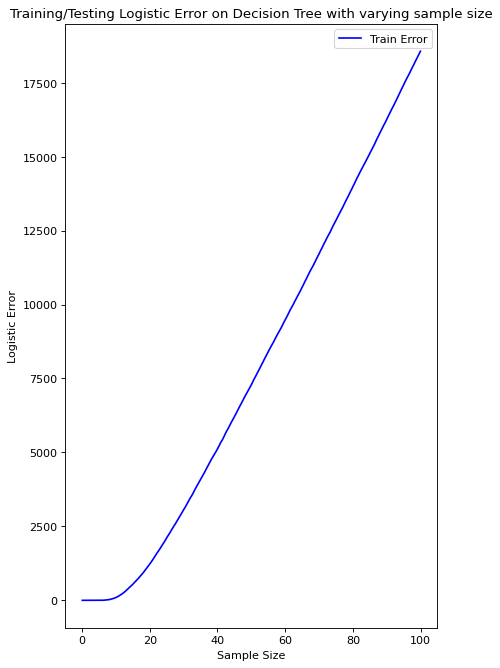

In [56]:
import numpy as np
import random
from math import log2
import statistics as st

def generate_x_data(size):
    X = np.array([np.array([1 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    return X, X.T

def generate_y_data(X, sigma):
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma, len(X[0])))
    return Y

def p(a, b):
    return (a / b)

def p2(a, b):
    if a == 0:
        return 0
    return p(a, b) * log2(p(a, b))

class DecisionTree():
    cnt = 0
    def __init__(self, x, y, d, sample_size):
        
        self.x, self.y, self.d = x, y, d
        
        self.ind = -1
        self.left, self.right = None, None
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        #self.result = self.y[0]
        
        self.child = len(self.y) <= sample_size or d >= 1000 or np.all(self.y == self.y[0])
        self.result = ((self.y == 1).sum()) / len(self.y)
        
        self.sample_size = sample_size
        
        if not self.child:
            self.split()

    def find_best_index(self):
        Hy = -p2(len(self.y[self.y == -1]), len(self.y)) - p2(len(self.y[self.y == 1]), len(self.y)) - p2(len(self.y[self.y == 0]), len(self.y))
        
        IG, ind = float('-inf'), -1
        
        for i, xi in enumerate(self.x):
            xi_neg_fltr = xi == -1
            xi_pos_fltr = xi == 1
            
            x_neg_sz = len(xi[xi_neg_fltr])
            x_pos_sz = len(xi[xi_pos_fltr])
            
            y_neg = self.y[xi_neg_fltr]
            
            y_neg_neg = len(y_neg[y_neg == -1])
            y_neg_pos = len(y_neg[y_neg == 1])
            y_neg_zer = len(y_neg[y_neg == 0])
            
            sm_y_neg = -p2(y_neg_neg, x_neg_sz) - p2(y_neg_pos, x_neg_sz) - p2(y_neg_zer, x_neg_sz)
            y_pos = self.y[xi_pos_fltr]
            
            y_pos_neg = len(y_pos[y_pos == -1])
            y_pos_pos = len(y_pos[y_pos == 1])
            y_pos_zer = len(y_pos[y_pos == 0])
            
            sm_y_pos = -p2(y_pos_neg, x_pos_sz) - p2(y_pos_pos, x_pos_sz) - p2(y_pos_zer, x_pos_sz)
            
            sm = p(x_neg_sz, len(xi)) * sm_y_neg + p(x_pos_sz, len(xi)) * sm_y_pos
            IG_i = Hy - sm
            
            if IG_i > IG:
                ind, IG = i, IG_i
        
        #print(" ", ind)
        return ind
    
    def split(self):
        self.ind = self.find_best_index()
        if self.ind >= 5:
            DecisionTree.cnt += 1
        xi = self.x[self.ind]
        
        fltr_left = xi == -1
        fltr_right = xi == 1
        
        x_left = [x_i[fltr_left] for x_i in self.x]
        x_right = [x_i[fltr_right] for x_i in self.x]
    
        y_left = self.y[fltr_left]
        y_right = self.y[fltr_right]

        self.left = DecisionTree(x_left, y_left, self.d + 1, self.sample_size)
        self.right = DecisionTree(x_right, y_right, self.d + 1, self.sample_size)
    
    @staticmethod
    def predict(node, arr):
        if node.child:
            return node.result
        return DecisionTree.predict(node.left, arr) if arr[node.ind] == -1 else DecisionTree.predict(node.right, arr)

import matplotlib.pyplot as plt
def question4():
    trainX, trainX_transpose = generate_x_data(5000)
    
    testX, testX_transpose = generate_x_data(500)
    arr = []
    for noise in np.arange(0.04, 100, 0.02):
        trainY = generate_y_data(trainX, noise)
        testY = generate_y_data(testX, noise)
        dt = DecisionTree(copy.deepcopy(trainX), copy.deepcopy(trainY), 1, 1000)
        arr.append(dt.cnt)
    
    plt.figure(figsize = (6, 10), dpi = 80)
    plt.title('Training/Testing Logistic Error on Decision Tree with varying sample size')
    plt.plot(np.arange(0.04, 100, 0.02), arr, '-b', label = 'Train Error')
    #plt.plot(range(1, 5001, 2), test_mismatches, '-r', label = 'Test Error')
    plt.xlabel('Sample Size')
    plt.ylabel('Logistic Error')
    plt.legend()
    plt.show()
    
    
question4()

In [44]:
def generate_x_data(size):
    X = np.array([np.array([1 if random.random() > 0.5 else -1 for _ in range(size)]) for _ in range(15)])
    return X, X.T

def generate_y_data(X, sigma):
    Y = np.sign(0.9 * X[0] + (0.9 ** 2) * X[1] + (0.9 ** 3) * X[2] + (0.9 ** 4) * X[3] + (0.9 ** 5) * X[4] + np.random.normal(0, sigma, len(X[0])))
    return Y


5000


In [51]:
np.random.normal(0, 25)

-0.3570975593410387